#Pre-processing data

##Load Dataset

In [ ]:
!gdown "16h_mWdWCsAQeO2cu_AccT1d1pW9WP60t"

Downloading...
From: https://drive.google.com/uc?id=16h_mWdWCsAQeO2cu_AccT1d1pW9WP60t
To: /content/data_ws.zip
100% 21.8M/21.8M [00:00<00:00, 98.6MB/s]


In [ ]:
!unzip data_ws.zip

Archive:  data_ws.zip
   creating: data_ws/
  inflating: data_ws/ws_0.jpg        
  inflating: data_ws/ws_1.jpg        
  inflating: data_ws/ws_10.jpg       
  inflating: data_ws/ws_100.jpg      
  inflating: data_ws/ws_1000.jpg     
  inflating: data_ws/ws_1001.jpg     
  inflating: data_ws/ws_1002.jpg     
  inflating: data_ws/ws_1003.jpg     
  inflating: data_ws/ws_1004.jpg     
  inflating: data_ws/ws_1005.jpg     
  inflating: data_ws/ws_1006.jpg     
  inflating: data_ws/ws_1007.jpg     
  inflating: data_ws/ws_1008.jpg     
  inflating: data_ws/ws_1009.jpg     
  inflating: data_ws/ws_101.jpg      
  inflating: data_ws/ws_1010.jpg     
  inflating: data_ws/ws_1011.jpg     
  inflating: data_ws/ws_1012.jpg     
  inflating: data_ws/ws_1013.jpg     
  inflating: data_ws/ws_1014.jpg     
  inflating: data_ws/ws_1015.jpg     
  inflating: data_ws/ws_1016.jpg     
  inflating: data_ws/ws_1017.jpg     
  inflating: data_ws/ws_1018.jpg     
  inflating: data_ws/ws_1019.jpg     
  infl

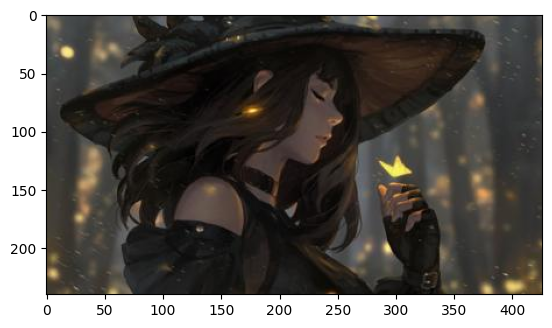

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data_ws/ws_0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

#Splitting dataset to train, test and val

In [ ]:
import os
import random
import pandas as pd

# Path to your image folder
data_ws_dir = "/content/data_ws/"

# Get all image file paths
all_images = [os.path.join(data_ws_dir, filename) for filename in os.listdir(data_ws_dir)]

# Shuffle the paths randomly
random.shuffle(all_images)

# Split paths
train_data_ws = all_images[:967]
remaining_data_ws = all_images[967:]
test_data_ws = remaining_data_ws[:len(remaining_data_ws)//2]
val_data_ws = remaining_data_ws[len(remaining_data_ws)//2:]

print(f"Images have been randomly distributed: {len(train_data_ws)} to train, {len(test_data_ws)} to test, and {len(val_data_ws)} to val subfolders.")

Images have been randomly distributed: 967 to train, 121 to test, and 121 to val subfolders.


In [ ]:
# Write to CSV files
train_df = pd.DataFrame({"image_path": train_data_ws})
test_df = pd.DataFrame({"image_path": test_data_ws})
val_df = pd.DataFrame({"image_path": val_data_ws})

train_df.to_csv("train.csv", index=False) # train_img.csv
test_df.to_csv("test.csv", index=False) # test_img.csv
val_df.to_csv("val.csv", index=False) #val_img.csv

In [ ]:
train_df2list = train_df['image_path'].tolist()
# test_df2list = test_images['image_path'].tolist()
# val_df2list = val_images['image_path'].tolist()

In [ ]:
train_df2list[:5]

['/content/data_ws/ws_12.jpg',
 '/content/data_ws/ws_417.jpg',
 '/content/data_ws/ws_693.jpg',
 '/content/data_ws/ws_491.jpg',
 '/content/data_ws/ws_214.jpg']

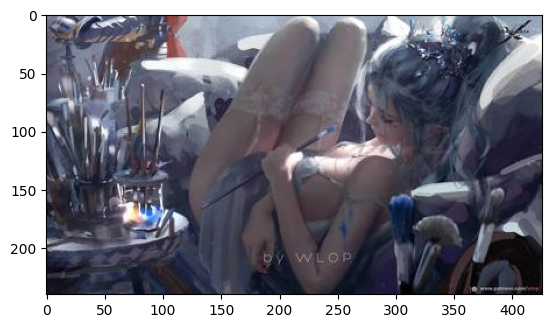

In [ ]:
img = cv2.imread(train_df2list[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

##Convert Images to numpy Array

In [31]:
from PIL import Image
import numpy as np

def image2array(csv_path, image_dir):
    """
    Load images from a CSV file containing image paths.

    Args:
        csv_path (str): Path to the CSV file with image paths.
        image_folder (str): Path to the folder containing the images.

    Returns:
        list of numpy.ndarray: List of image arrays.
    """
    image_paths_df = pd.read_csv(csv_path)
    image_paths = image_paths_df['image_path'].tolist()

    image_arrays = []
    for img_path in image_paths:
        img_full_path = os.path.join(image_dir, img_path)
        img = Image.open(img_full_path)
        img_array = np.array(img)
        image_arrays.append(img_array)

    return image_arrays

In [32]:
train_csv_path = 'train.csv'
test_csv_path = 'test.csv'
val_csv_path = 'val.csv'

image_dir_path = '/content/data_ws'

train_images_arr = image2array(train_csv_path, image_dir_path)
test_images_arr = image2array(test_csv_path, image_dir_path)
val_images_arr = image2array(val_csv_path, image_dir_path)

print(f"Converted {len(train_images_arr)} train images to array.")
print(f"Converted {len(test_images_arr)} test images to array.")
print(f"Converted {len(val_images_arr)} val images to array.")

Converted 967 train images to array.
Converted 121 test images to array.
Converted 121 val images to array.


In [33]:
train_images_arr[0].shape

(240, 426, 3)

In [34]:
test_images_arr[0].shape

(240, 426, 3)

In [35]:
val_images_arr[0].shape

(240, 426, 3)

#Model Implementation

In [36]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, UpSampling2D


def encoder_decoder_model():

    """
    Used to build Convolutional Autoencoder model architecture to get compressed image data which is easier to process.
    Returns:
    Auto encoder model
    """
    #Encoder
    model = Sequential(name='Convolutional_AutoEncoder_Model')
    model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(240, 426, 3),padding='same', name='Encoding_Conv2D_1'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_1'))
    model.add(Conv2D(128, kernel_size=(3, 3),strides=1,kernel_regularizer = tf.keras.regularizers.L2(0.001),activation='relu',padding='same', name='Encoding_Conv2D_2'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_2'))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',kernel_regularizer= tf.keras.regularizers.L2(0.001), padding='same', name='Encoding_Conv2D_3'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_3'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_regularizer= tf.keras.regularizers.L2(0.001), padding='same', name='Encoding_Conv2D_4'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2,padding='valid', name='Encoding_MaxPooling2D_4'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', name='Encoding_Conv2D_5'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

    #Decoder
    model.add(Conv2D(512, kernel_size=(3, 3), kernel_regularizer = tf.keras.regularizers.L2(0.001),activation='relu', padding='same', name='Decoding_Conv2D_1'))
    model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_1'))
    model.add(Conv2D(512, kernel_size=(3, 3), kernel_regularizer = tf.keras.regularizers.L2(0.001), activation='relu', padding='same', name='Decoding_Conv2D_2'))
    model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_2'))
    model.add(Conv2D(256, kernel_size=(3, 3), kernel_regularizer = tf.keras.regularizers.L2(0.001), activation='relu', padding='same',name='Decoding_Conv2D_3'))
    model.add(UpSampling2D((2, 2),name='Decoding_Upsamping2D_3'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer = tf.keras.regularizers.L2(0.001), padding='same',name='Decoding_Conv2D_4'))
    model.add(UpSampling2D((2, 2),name='Decoding_Upsamping2D_4'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer = tf.keras.regularizers.L2(0.001), padding='same',name='Decoding_Conv2D_5'))
    model.add(UpSampling2D((2, 2),name='Decoding_Upsamping2D_5'))
    model.add(Conv2D(3, kernel_size=(3, 3), padding='same',activation='sigmoid',name='Decoding_Output'))
    return model

In [37]:
model = encoder_decoder_model()
model.summary()
print("\n")
# tf.keras.utils.plot_model(model, to_file='/content/drive/My Drive/model.png')

Model: "Convolutional_AutoEncoder_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoding_Conv2D_1 (Conv2D)  (None, 240, 426, 64)      1792      
                                                                 
 Encoding_MaxPooling2D_1 (M  (None, 120, 213, 64)      0         
 axPooling2D)                                                    
                                                                 
 Encoding_Conv2D_2 (Conv2D)  (None, 120, 213, 128)     73856     
                                                                 
 Encoding_MaxPooling2D_2 (M  (None, 60, 107, 128)      0         
 axPooling2D)                                                    
                                                                 
 Encoding_Conv2D_3 (Conv2D)  (None, 60, 107, 256)      295168    
                                                                 
 Encoding_MaxPooling2D_3 (M  (None,

In [38]:
from keras.optimizers import Adam, Adagrad, RMSprop

parameters = {'Adagrad':[0.01,0.001,0.0001,0.00001],'Adam':[0.01,0.001,0.0001,0.00001],'Rmsprop':[0.01,0.001,0.0001,0.00001]}
result = []
for i in parameters.keys():
    print("{} as an optimizer:".format(i))
    values = parameters[i]
    result_ = []
    for learning_rate in values:
        print("\t\tUsing learning_rate: "+str(learning_rate))
        model = encoder_decoder_model()
        if i=='Adam':
            optimizer = Adam(learning_rate=learning_rate)
        elif i=='Adagrad':
            optimizer = Adagrad(learning_rate=learning_rate)
        else:
            optimizer = RMSprop(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss='mse')             # compiling
        model.fit(train_images_arr, train_images_arr, epochs=5, batch_size=32,validation_data=(test_images_arr,test_images_arr))  # fitting data
        result_.append(model.history.history)           # taking result to judge the best parameters.
    print()
    result.append(result_)

Adagrad as an optimizer:
		Using learning_rate: 0.01
Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "Convolutional_AutoEncoder_Model" expects 1 input(s), but it received 967 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:3' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:4' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:5' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:6' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:7' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:8' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:9' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:10' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:11' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:12' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:13' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:14' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:15' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:16' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:17' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:18' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:19' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:20' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:21' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:22' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:23' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:24' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:25' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:26' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:27' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:28' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:29' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:30' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:31' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:32' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:33' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:34' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:35' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:36' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:37' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:38' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:39' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:40' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:41' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:42' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:43' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:44' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:45' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:46' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:47' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:48' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:49' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:50' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:51' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:52' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:53' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:54' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:55' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:56' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:57' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:58' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:59' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:60' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:61' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:62' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:63' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:64' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:65' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:66' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:67' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:68' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:69' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:70' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:71' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:72' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:73' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:74' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:75' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:76' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:77' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:78' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:79' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:80' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:81' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:82' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:83' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:84' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:85' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:86' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:87' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:88' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:89' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:90' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:91' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:92' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:93' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:94' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:95' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:96' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:97' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:98' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:99' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:100' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:101' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:102' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:103' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:104' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:105' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:106' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:107' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:108' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:109' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:110' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:111' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:112' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:113' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:114' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:115' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:116' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:117' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:118' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:119' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:120' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:121' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:122' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:123' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:124' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:125' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:126' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:127' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:128' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:129' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:130' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:131' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:132' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:133' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:134' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:135' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:136' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:137' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:138' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:139' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:140' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:141' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:142' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:143' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:144' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:145' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:146' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:147' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:148' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:149' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:150' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:151' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:152' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:153' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:154' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:155' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:156' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:157' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:158' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:159' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:160' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:161' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:162' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:163' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:164' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:165' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:166' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:167' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:168' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:169' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:170' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:171' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:172' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:173' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:174' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:175' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:176' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:177' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:178' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:179' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:180' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:181' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:182' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:183' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:184' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:185' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:186' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:187' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:188' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:189' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:190' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:191' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:192' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:193' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:194' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:195' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:196' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:197' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:198' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:199' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:200' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:201' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:202' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:203' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:204' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:205' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:206' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:207' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:208' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:209' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:210' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:211' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:212' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:213' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:214' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:215' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:216' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:217' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:218' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:219' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:220' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:221' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:222' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:223' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:224' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:225' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:226' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:227' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:228' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:229' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:230' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:231' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:232' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:233' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:234' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:235' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:236' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:237' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:238' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:239' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:240' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:241' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:242' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:243' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:244' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:245' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:246' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:247' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:248' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:249' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:250' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:251' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:252' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:253' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:254' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:255' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:256' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:257' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:258' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:259' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:260' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:261' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:262' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:263' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:264' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:265' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:266' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:267' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:268' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:269' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:270' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:271' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:272' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:273' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:274' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:275' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:276' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:277' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:278' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:279' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:280' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:281' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:282' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:283' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:284' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:285' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:286' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:287' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:288' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:289' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:290' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:291' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:292' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:293' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:294' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:295' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:296' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:297' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:298' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:299' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:300' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:301' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:302' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:303' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:304' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:305' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:306' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:307' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:308' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:309' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:310' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:311' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:312' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:313' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:314' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:315' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:316' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:317' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:318' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:319' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:320' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:321' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:322' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:323' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:324' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:325' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:326' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:327' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:328' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:329' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:330' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:331' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:332' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:333' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:334' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:335' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:336' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:337' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:338' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:339' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:340' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:341' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:342' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:343' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:344' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:345' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:346' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:347' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:348' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:349' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:350' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:351' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:352' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:353' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:354' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:355' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:356' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:357' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:358' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:359' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:360' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:361' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:362' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:363' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:364' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:365' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:366' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:367' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:368' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:369' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:370' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:371' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:372' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:373' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:374' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:375' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:376' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:377' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:378' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:379' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:380' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:381' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:382' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:383' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:384' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:385' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:386' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:387' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:388' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:389' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:390' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:391' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:392' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:393' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:394' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:395' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:396' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:397' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:398' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:399' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:400' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:401' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:402' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:403' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:404' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:405' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:406' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:407' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:408' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:409' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:410' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:411' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:412' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:413' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:414' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:415' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:416' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:417' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:418' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:419' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:420' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:421' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:422' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:423' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:424' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:425' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:426' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:427' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:428' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:429' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:430' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:431' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:432' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:433' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:434' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:435' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:436' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:437' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:438' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:439' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:440' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:441' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:442' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:443' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:444' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:445' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:446' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:447' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:448' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:449' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:450' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:451' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:452' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:453' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:454' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:455' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:456' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:457' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:458' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:459' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:460' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:461' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:462' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:463' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:464' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:465' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:466' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:467' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:468' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:469' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:470' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:471' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:472' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:473' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:474' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:475' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:476' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:477' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:478' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:479' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:480' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:481' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:482' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:483' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:484' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:485' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:486' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:487' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:488' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:489' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:490' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:491' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:492' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:493' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:494' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:495' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:496' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:497' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:498' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:499' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:500' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:501' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:502' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:503' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:504' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:505' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:506' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:507' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:508' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:509' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:510' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:511' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:512' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:513' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:514' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:515' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:516' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:517' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:518' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:519' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:520' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:521' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:522' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:523' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:524' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:525' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:526' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:527' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:528' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:529' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:530' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:531' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:532' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:533' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:534' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:535' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:536' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:537' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:538' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:539' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:540' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:541' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:542' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:543' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:544' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:545' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:546' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:547' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:548' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:549' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:550' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:551' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:552' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:553' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:554' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:555' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:556' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:557' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:558' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:559' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:560' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:561' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:562' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:563' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:564' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:565' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:566' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:567' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:568' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:569' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:570' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:571' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:572' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:573' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:574' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:575' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:576' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:577' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:578' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:579' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:580' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:581' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:582' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:583' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:584' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:585' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:586' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:587' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:588' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:589' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:590' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:591' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:592' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:593' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:594' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:595' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:596' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:597' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:598' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:599' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:600' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:601' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:602' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:603' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:604' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:605' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:606' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:607' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:608' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:609' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:610' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:611' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:612' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:613' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:614' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:615' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:616' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:617' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:618' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:619' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:620' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:621' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:622' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:623' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:624' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:625' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:626' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:627' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:628' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:629' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:630' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:631' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:632' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:633' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:634' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:635' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:636' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:637' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:638' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:639' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:640' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:641' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:642' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:643' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:644' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:645' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:646' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:647' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:648' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:649' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:650' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:651' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:652' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:653' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:654' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:655' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:656' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:657' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:658' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:659' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:660' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:661' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:662' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:663' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:664' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:665' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:666' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:667' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:668' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:669' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:670' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:671' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:672' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:673' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:674' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:675' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:676' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:677' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:678' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:679' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:680' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:681' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:682' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:683' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:684' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:685' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:686' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:687' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:688' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:689' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:690' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:691' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:692' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:693' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:694' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:695' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:696' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:697' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:698' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:699' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:700' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:701' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:702' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:703' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:704' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:705' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:706' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:707' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:708' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:709' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:710' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:711' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:712' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:713' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:714' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:715' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:716' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:717' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:718' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:719' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:720' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:721' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:722' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:723' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:724' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:725' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:726' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:727' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:728' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:729' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:730' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:731' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:732' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:733' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:734' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:735' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:736' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:737' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:738' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:739' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:740' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:741' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:742' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:743' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:744' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:745' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:746' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:747' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:748' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:749' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:750' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:751' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:752' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:753' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:754' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:755' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:756' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:757' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:758' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:759' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:760' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:761' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:762' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:763' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:764' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:765' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:766' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:767' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:768' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:769' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:770' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:771' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:772' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:773' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:774' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:775' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:776' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:777' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:778' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:779' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:780' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:781' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:782' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:783' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:784' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:785' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:786' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:787' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:788' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:789' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:790' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:791' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:792' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:793' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:794' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:795' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:796' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:797' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:798' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:799' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:800' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:801' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:802' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:803' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:804' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:805' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:806' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:807' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:808' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:809' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:810' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:811' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:812' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:813' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:814' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:815' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:816' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:817' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:818' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:819' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:820' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:821' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:822' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:823' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:824' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:825' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:826' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:827' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:828' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:829' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:830' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:831' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:832' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:833' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:834' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:835' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:836' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:837' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:838' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:839' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:840' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:841' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:842' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:843' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:844' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:845' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:846' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:847' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:848' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:849' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:850' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:851' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:852' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:853' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:854' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:855' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:856' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:857' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:858' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:859' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:860' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:861' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:862' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:863' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:864' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:865' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:866' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:867' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:868' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:869' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:870' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:871' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:872' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:873' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:874' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:875' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:876' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:877' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:878' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:879' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:880' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:881' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:882' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:883' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:884' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:885' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:886' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:887' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:888' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:889' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:890' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:891' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:892' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:893' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:894' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:895' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:896' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:897' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:898' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:899' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:900' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:901' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:902' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:903' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:904' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:905' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:906' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:907' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:908' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:909' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:910' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:911' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:912' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:913' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:914' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:915' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:916' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:917' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:918' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:919' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:920' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:921' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:922' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:923' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:924' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:925' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:926' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:927' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:928' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:929' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:930' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:931' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:932' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:933' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:934' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:935' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:936' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:937' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:938' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:939' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:940' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:941' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:942' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:943' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:944' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:945' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:946' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:947' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:948' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:949' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:950' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:951' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:952' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:953' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:954' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:955' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:956' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:957' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:958' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:959' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:960' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:961' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:962' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:963' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:964' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:965' shape=(None, 426, 3) dtype=uint8>, <tf.Tensor 'IteratorGetNext:966' shape=(None, 426, 3) dtype=uint8>]
